In [121]:
# import all packages
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import MultiPoint, Point
import requests
import folium
import geopandas as gpd
import fiona

In [122]:
#import a basemap of Iowa City using Open Street Maps
map_osm = folium.Map(location=[41.6611, -91.5302], zoom_start=11)

map_osm

In [123]:
#now pull the APIs from OSM of green space locations within Johnson County

place = 'Johnson County Iowa, USA'
tags= {'leisure':'park', 'boundary':'forest', 'boundary':'national_park', 'landuse':'forest', 'landuse':'recreation_ground',
      'leisure':'garden', 'leisure':'nature_reserve', 'natural':'wood'}

df = ox.geometries_from_place(place,tags=tags)

df.head(5)

C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


landuse         leisure  \
element_type osmid                                           
node         7775769597  recreation_ground            park   
way          29273967                  NaN  nature_reserve   
             29782643                  NaN  nature_reserve   
             60614862                  NaN             NaN   
             107262574                 NaN             NaN   

                                                                   name  \
element_type osmid                                                        
node         7775769597  Nancy Seiberlin Heritage Grove Recreation Area   
way          29273967                    Ryerson's Woods State Preserve   
             29782643                         Frytown Conservation Area   
             60614862                                               NaN   
             107262574                                              NaN   

                                                                  geometry  \
element_type osmid                                                           
node         7775769597                         POINT (-91.51469 41.67200)   
way          29273967    POLYGON ((-91.54586 41.61725, -91.54637 41.616...   
             29782643    POLYGON ((-91.71244 41.58375, -91.72691 41.584...   
             60614862    POLYGON ((-91.38058 41.81796, -91.37967 41.818...   
             107262574   POLYGON ((-91.60493 41.66620, -91.60558 41.666...   

                                                                     nodes  \
element_type osmid                                                           
node         7775769597                                                NaN   
way          29273967    [321905272, 321905273, 321905274, 321905275, 3...   
             29782643    [328087427, 328087430, 328087432, 5506648967, ...   
             60614862    [757794680, 757794743, 757794741, 757794739, 7...   
             107262574   [1233180198, 1233180272, 1233180321, 123318025...   

                               boundary  ele gnis:county_id gnis:created  \
element_type osmid                                                         
node         7775769597             NaN  NaN            NaN          NaN   
way          29273967    protected_area  218            103   10/04/2004   
             29782643    protected_area  NaN            NaN          NaN   
             60614862               NaN  NaN            NaN          NaN   
             107262574              NaN  NaN            NaN          NaN   

                        gnis:feature_id  ... addr:street abandoned:landuse  \
element_type osmid                       ...                                 
node         7775769597             NaN  ...         NaN               NaN   
way          29273967           2047467  ...         NaN               NaN   
             29782643               NaN  ...         NaN               NaN   
             60614862               NaN  ...         NaN               NaN   
             107262574              NaN  ...         NaN               NaN   

                        access elevation leaf_cycle area owner leaf_type ways  \
element_type osmid                                                              
node         7775769597    NaN       NaN        NaN  NaN   NaN       NaN  NaN   
way          29273967      NaN       NaN        NaN  NaN   NaN       NaN  NaN   
             29782643      NaN       NaN        NaN  NaN   NaN       NaN  NaN   
             60614862      NaN       NaN        NaN  NaN   NaN       NaN  NaN   
             107262574     NaN       NaN        NaN  NaN   NaN       NaN  NaN   

                        type  
element_type osmid            
node         7775769597  NaN  
way          29273967    NaN  
             29782643    NaN  
             60614862    NaN  
             107262574   NaN  

[5 rows x 31 columns]

C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

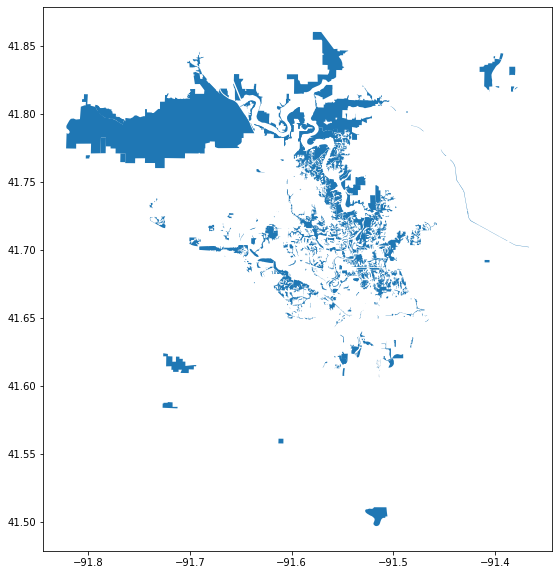

In [124]:
#made sure it's in a geodataframe
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326")

#remove all the point features, keep only the polygons & multipolygons
gdf = gdf[gdf.geom_type != 'Point']

#plot the new gdf
gdf.plot(figsize=(15,10))


In [8]:
#convert to geojson just for projecting onto Folium maps
gsjon = gdf.to_crs(epsg='4326').to_json()
polygons = folium.features.GeoJson(gsjon)

map_osm.add_child(polygons)
map_osm

C:\Users\tfilip\AppData\Local\Temp\ipykernel_8204\2922162427.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf['geometry'].centroid
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in

<AxesSubplot:>

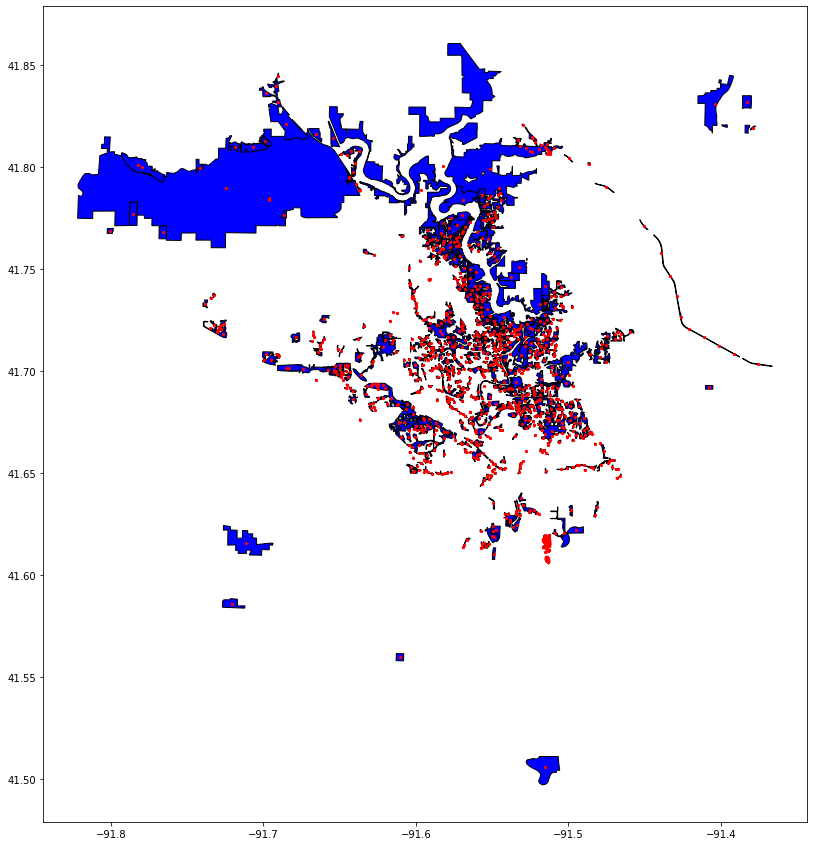

In [120]:
#get the centroids of each polygon
centroid = gdf['geometry'].centroid

#plot the basemap as the polygons in blue
base = gdf.plot(color='blue', edgecolor='black', figsize=(15,15))
#plot the centroids on top of that in red 
centroid.plot(ax=base, marker='o', color="red", markersize=5)


In [78]:
#examine the features of the centroid geodataframe = theyre all point features in the correct projection
centroid

element_type  osmid    
way           29273967     POINT (-91.54879 41.61849)
              29782643     POINT (-91.72092 41.58584)
              60614862     POINT (-91.37909 41.81908)
              107262574    POINT (-91.60477 41.66769)
              107262576    POINT (-91.61008 41.66776)
                                      ...            
relation      14103067     POINT (-91.53096 41.63752)
              14335605     POINT (-91.51291 41.61545)
              14339860     POINT (-91.51398 41.61456)
              14345819     POINT (-91.51465 41.61361)
              14359403     POINT (-91.51565 41.61429)
Length: 1331, dtype: geometry

In [12]:
#import a shapefile of johnson county by census tract as a new geodataframe called census
census = gpd.read_file('H:/Classes/Geographic Visualization/Final Project/johnsoncountyshape/johnsoncountyshp.shp')
census

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,19,103,001801,19103001801,18.01,Census Tract 18.01,G5020,S,13934664,593000,+41.6175794,-091.5012925,"POLYGON ((-91.53768 41.62407, -91.53737 41.624..."
1,19,103,010301,19103010301,103.01,Census Tract 103.01,G5020,S,197309634,1967183,+41.7380390,-091.7216768,"POLYGON ((-91.83416 41.68792, -91.83414 41.688..."
2,19,103,010302,19103010302,103.02,Census Tract 103.02,G5020,S,40226649,4782790,+41.7438502,-091.5807048,"POLYGON ((-91.61712 41.77498, -91.61712 41.775..."
3,19,103,001802,19103001802,18.02,Census Tract 18.02,G5020,S,3294885,124425,+41.6366549,-091.5242066,"POLYGON ((-91.53824 41.64071, -91.53812 41.641..."
4,19,103,000200,19103000200,2,Census Tract 2,G5020,S,3173368,95385,+41.6784456,-091.5705349,"POLYGON ((-91.58185 41.68920, -91.58152 41.689..."
5,19,103,000301,19103000301,3.01,Census Tract 3.01,G5020,S,19799792,112799,+41.7008388,-091.6009113,"POLYGON ((-91.64226 41.70383, -91.64226 41.704..."
6,19,103,001600,19103001600,16,Census Tract 16,G5020,S,1070193,0,+41.6566484,-091.5259596,"POLYGON ((-91.53470 41.65355, -91.53470 41.653..."
7,19,103,001300,19103001300,13,Census Tract 13,G5020,S,1839703,0,+41.6621556,-091.4923332,"POLYGON ((-91.50210 41.66628, -91.50177 41.666..."
8,19,103,001500,19103001500,15,Census Tract 15,G5020,S,1476994,0,+41.6523399,-091.5102310,"POLYGON ((-91.52118 41.65596, -91.52118 41.656..."
9,19,103,001700,19103001700,17,Census Tract 17,G5020,S,3944928,24865,+41.6425449,-091.5094982,"POLYGON ((-91.53902 41.65278, -91.53853 41.652..."


C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

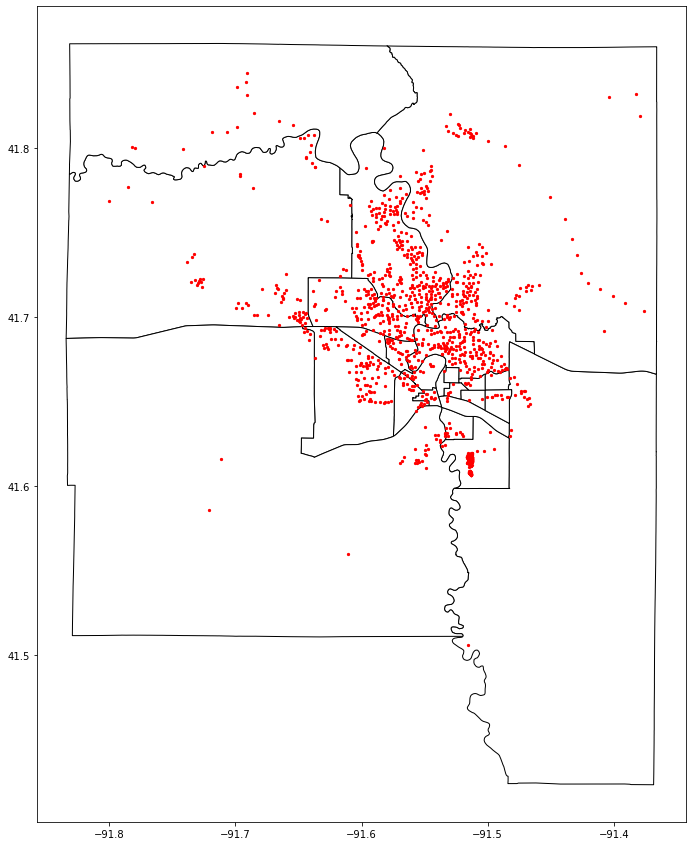

In [13]:
#plot the centroids on the map with the census tract data
#base of the plot = the census tract shapefiel
base = census.plot(color='white', edgecolor='black', figsize=(15,15))
#centroids of the greenspaces = red markers
centroid.plot(ax=base, marker='o', color="red", markersize=5)

In [20]:
#first find the number of points within each polygon (each census tract)
dfsjoin = gpd.sjoin(left_df=gdf, right_df=census, how='left') #Left or polygons with zero points are discarded
dfcount = dfsjoin.groupby('TRACTCE')['geometry'].count().rename('pointcount').reset_index() #count by number within polygon and return new df

dfcount

,TRACTCE,pointcount
0,000100,169
1,000200,23
2,000301,116
3,000302,5
4,000400,89
5,000500,19
6,000600,11
7,001200,5
8,001300,1
9,001400,9


In [22]:
#append dfcount (the pointcount column) to census gdf
census = pd.merge(census, dfcount, on='TRACTCE', how='outer')
census

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,pointcount
0,19,103,001801,19103001801,18.01,Census Tract 18.01,G5020,S,13934664,593000,+41.6175794,-091.5012925,"POLYGON ((-91.53768 41.62407, -91.53737 41.624...",321.0
1,19,103,010301,19103010301,103.01,Census Tract 103.01,G5020,S,197309634,1967183,+41.7380390,-091.7216768,"POLYGON ((-91.83416 41.68792, -91.83414 41.688...",82.0
2,19,103,010302,19103010302,103.02,Census Tract 103.02,G5020,S,40226649,4782790,+41.7438502,-091.5807048,"POLYGON ((-91.61712 41.77498, -91.61712 41.775...",239.0
3,19,103,001802,19103001802,18.02,Census Tract 18.02,G5020,S,3294885,124425,+41.6366549,-091.5242066,"POLYGON ((-91.53824 41.64071, -91.53812 41.641...",11.0
4,19,103,000200,19103000200,2,Census Tract 2,G5020,S,3173368,95385,+41.6784456,-091.5705349,"POLYGON ((-91.58185 41.68920, -91.58152 41.689...",23.0
5,19,103,000301,19103000301,3.01,Census Tract 3.01,G5020,S,19799792,112799,+41.7008388,-091.6009113,"POLYGON ((-91.64226 41.70383, -91.64226 41.704...",116.0
6,19,103,001600,19103001600,16,Census Tract 16,G5020,S,1070193,0,+41.6566484,-091.5259596,"POLYGON ((-91.53470 41.65355, -91.53470 41.653...",4.0
7,19,103,001300,19103001300,13,Census Tract 13,G5020,S,1839703,0,+41.6621556,-091.4923332,"POLYGON ((-91.50210 41.66628, -91.50177 41.666...",1.0
8,19,103,001500,19103001500,15,Census Tract 15,G5020,S,1476994,0,+41.6523399,-091.5102310,"POLYGON ((-91.52118 41.65596, -91.52118 41.656...",2.0
9,19,103,001700,19103001700,17,Census Tract 17,G5020,S,3944928,24865,+41.6425449,-091.5094982,"POLYGON ((-91.53902 41.65278, -91.53853 41.652...",2.0


In [77]:
##to examine the census json file to see which feature properties exist
#test = census.to_json()
#print(test)

#create a folium choropleth using the number of points (greenspace centroids) in each census tract 
choromap = folium.Map(location=[41.6611, -91.5302], zoom_start=10)

folium.Choropleth(geo_data=census.to_json(),
                  name='choropleth',
                  data=census,
                  columns=["GEOID", "pointcount"],
                  fill_color='YlGn',
                  fill_opacity=0.7,
                  line_opacity=1,
                  nan_fill_color='grey',
                  key_on="feature.properties.GEOID",
                  legend_name='Number of Greenspaces').add_to(choromap)

#add in popup functions to choropleth map
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', #outline of polygon color (black)
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', #when hover over, fill color (black)
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
popup = folium.features.GeoJson(
    census,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['TRACTCE','pointcount'],  # use fields from the json file
        aliases=['Census Tract Number: ','Number of Greenspaces: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
choromap.add_child(popup)
choromap.keep_in_front(popup)
folium.LayerControl().add_to(choromap)

##add point features to map


choromap

# Find the area of the green space polygons instead of # of centroids

In [108]:
#find the area of each greenspace polygon

gdf['area'] = gdf['geometry'].to_crs({'init': 'epsg:3395'})\ ##need to reproject 
               .map(lambda p: p.area / 10**6) ##/ by 1000000 bc area fcn gives meters^2, but this gives km^2 

gdf

C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


landuse         leisure  \
element_type osmid                               
way          29273967      NaN  nature_reserve   
             29782643      NaN  nature_reserve   
             60614862      NaN             NaN   
             107262574     NaN             NaN   
             107262576     NaN             NaN   
...                        ...             ...   
relation     14103067      NaN             NaN   
             14335605      NaN             NaN   
             14339860      NaN             NaN   
             14345819      NaN             NaN   
             14359403      NaN             NaN   

                                                  name  \
element_type osmid                                       
way          29273967   Ryerson's Woods State Preserve   
             29782643        Frytown Conservation Area   
             60614862                              NaN   
             107262574                             NaN   
             107262576                             NaN   
...                                                ...   
relation     14103067                              NaN   
             14335605                              NaN   
             14339860                              NaN   
             14345819                              NaN   
             14359403                              NaN   

                                                                 geometry  \
element_type osmid                                                          
way          29273967   POLYGON ((-91.54586 41.61725, -91.54637 41.616...   
             29782643   POLYGON ((-91.71244 41.58375, -91.72691 41.584...   
             60614862   POLYGON ((-91.38058 41.81796, -91.37967 41.818...   
             107262574  POLYGON ((-91.60493 41.66620, -91.60558 41.666...   
             107262576  POLYGON ((-91.61321 41.66923, -91.61317 41.669...   
...                                                                   ...   
relation     14103067   POLYGON ((-91.53183 41.63590, -91.53239 41.636...   
             14335605   POLYGON ((-91.51287 41.61553, -91.51285 41.615...   
             14339860   POLYGON ((-91.51406 41.61448, -91.51408 41.614...   
             14345819   POLYGON ((-91.51408 41.61357, -91.51406 41.613...   
             14359403   POLYGON ((-91.51512 41.61452, -91.51514 41.614...   

                                                                    nodes  \
element_type osmid                                                          
way          29273967   [321905272, 321905273, 321905274, 321905275, 3...   
             29782643   [328087427, 328087430, 328087432, 5506648967, ...   
             60614862   [757794680, 757794743, 757794741, 757794739, 7...   
             107262574  [1233180198, 1233180272, 1233180321, 123318025...   
             107262576  [1233180297, 7873936160, 1233180276, 123318029...   
...                                                                   ...   
relation     14103067   [[[7770657521, 9712554111, 7943659462, 7770657...   
             14335605   [[[9875489505, 9875489528, 9875489624, 9875489...   
             14339860   [[[9879061448, 9879022603, 9879061769, 9879061...   
             14345819   [[[9882038097, 9882038120, 9882036338, 9882036...   
             14359403   [[[9892042541, 9892042124, 9892042083, 9892042...   

                              boundary  ele gnis:county_id gnis:created  \
element_type osmid                                                        
way          29273967   protected_area  218            103   10/04/2004   
             29782643   protected_area  NaN            NaN          NaN   
             60614862              NaN  NaN            NaN          NaN   
             107262574             NaN  NaN            NaN          NaN   
             107262576             NaN  NaN            NaN          NaN   
...                                ...  ...            ...          ...   
relation     

In [116]:
#create a new df called area
#append dfcount to census gdf

area = gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**6)



C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Cannot open C:\Users\tfilip\Anaconda3\envs\ox\Scripts\pip-script.py
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2da9c974820>


In [103]:
folium.features.GeoJson(centroid).add_to(choromap)
choromap

AssertionError: The field feeder is not available in the data. Choose from: ().

In [ ]:
#just get polygons to see if it works then
polyOnly = gdf[gdf.geom_type == 'Polygon']

polyOnly

In [11]:
#run kde on just the centroids 
import geoplot
import geoplot.crs as gcrs

ModuleNotFoundError: No module named 'geoplot'

In [56]:
gdf2 = gdf[['geometry']]
gdf2.to_file('H:/Classes/Geographic Visualization/Final Project/gdf2.shp', driver='ESRI Shapefile', crs='epsg:4326')

C:\Users\tfilip\AppData\Local\Temp\ipykernel_15604\987792445.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf2.to_file('H:/Classes/Geographic Visualization/Final Project/gdf2.shp', driver='ESRI Shapefile', crs='epsg:4326')
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\io\file.py:389: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(gdal_version) >= LooseVersion("3.0.0") and crs:


In [40]:
import geoplot
import geoplot.crs as gcrs


ModuleNotFoundError: No module named 'geoplot'

In [43]:
from itertools import product
from shapely.geometry import Point
import shapely.vectorized

# define grid spec from min to max value with spacing of grid_res=10
grid_res = 10

# # this isn't necessary in your case, but if your polygon had
# # boundaries not falling on grid edges, you might want to ensure
# # the grid started on specific cell boundaries or midpoints
# minx = np.floor(gdf.geometry.bounds[0] / grid_res) * grid_res
# maxx = np.ceil(gdf.geometry.bounds[2] / grid_res) * grid_res
# miny = np.floor(gdf.geometry.bounds[1] / grid_res) * grid_res
# maxy = np.ceil(gdf.geometry.bounds[3] / grid_res) * grid_res


# you can form the grid by setting up the coordinates and then filling
# the grid with numpy.meshgrid
x = np.arange(minx, maxx + grid_res / 2, grid_res)
y = np.arange(miny, maxy + grid_res / 2, grid_res)
XX, YY = np.meshgrid(x, y)

# use shapely.vectorized to find all points within the polygon
in_polygon = shapely.vectorized.contains(gdf.geometry, XX, YY)

# filter the points and flatten them to 1D vectors
x_in_polygon = XX[in_polygon].ravel()
y_in_polygon = YY[in_polygon].ravel()

NameError: name 'minx' is not defined

In [51]:
from itertools import product
from shapely.geometry import Point
import shapely.vectorized

xmin, ymin, xmax, ymax = gdf.bounds
# spacing = 10
# xcoords = [i for i in np.arange(xmin, xmax, spacing)]
# ycoords = [i for i in np.arange(ymin, ymax, spacing)]

gdf.bounds

minx       miny       maxx       maxy
element_type osmid                                                
way          29273967  -91.552808  41.616012 -91.545057  41.620272
             29782643  -91.726914  41.583748 -91.712204  41.588394
             60614862  -91.380576  41.817958 -91.377229  41.819973
             107262574 -91.606402  41.665148 -91.603042  41.669690
             107262576 -91.613209  41.664494 -91.606875  41.670258
...                           ...        ...        ...        ...
relation     14103067  -91.532698  41.635904 -91.527930  41.640148
             14335605  -91.513044  41.615292 -91.512778  41.615615
             14339860  -91.514086  41.614475 -91.513885  41.614650
             14345819  -91.515449  41.613121 -91.513971  41.614011
             14359403  -91.516326  41.613908 -91.514947  41.614646

[1331 rows x 4 columns]

In [43]:
geom_pts = gen_n_point_in_polygon(200, gdf2)

TypeError: gen_n_point_in_polygon() missing 1 required positional argument: 'polygon'